* Classifier의 불확실성을 추정할 수 있는 함수가 두 개 있음
* 보통 둘 중 하나는 제공되고 둘 다 제공되는 경우도 있음

#  decision_function

* 양성클래스에 속한다고 믿는 정도, 양수면 양성 클래스, 음수는 음성 클래스 예측
* class_ 의 첫번째 원소가 음성이고 두번째 원소가 양성
* decision_function의 출력범위는 데이터와 파라미터에 따라 달라지므로 이해하긴 어려움

In [1]:
from ml1.preamble import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(['blue', 'red'])[y]
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train_named)
print(f'decision_function 결과값 : {gbrt.decision_function(X_test)[:6]}')

decision_function 결과값 : [ 4.136 -1.702 -3.951 -3.626  4.29   3.662]


In [2]:
print('[음성, 양성] :', gbrt.classes_)
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
print( '예측값 :', gbrt.classes_[greater_zero])  # gbrt.predict(X_test와 같음)

[음성, 양성] : ['blue' 'red']
예측값 : ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


## 분석

* 결정경계와 결정함수

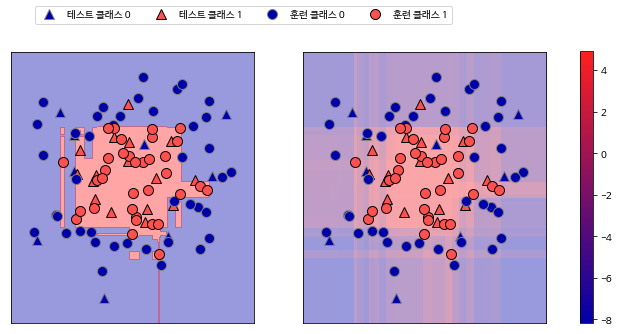

In [3]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax)
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['테스트 클래스 0', '테스트 클래스 1', '훈련 클래스 0', '훈련 클래스 1'], ncol=4, loc=(.1,1.1))

# predict_proba

* 0과 1 사이의 값인 확률이므로 decision_function의 출력보다 이해하기 쉬움
* 실제 확률은 아니고 모델과 매개변수 설정에 달렸음
    * 과대적합된 모델은 잘못된 예측도 확신이 강할 수 있음
    * 복잡도가 낮은 모델은 예측에 불확실성이 더 많음

In [4]:
print("예측 확률 :\n", gbrt.predict_proba(X_test)[:6])

예측 확률 :
 [[0.016 0.984]
 [0.846 0.154]
 [0.981 0.019]
 [0.974 0.026]
 [0.014 0.986]
 [0.025 0.975]]


## 분석

* 결정 경계와 예측 확률

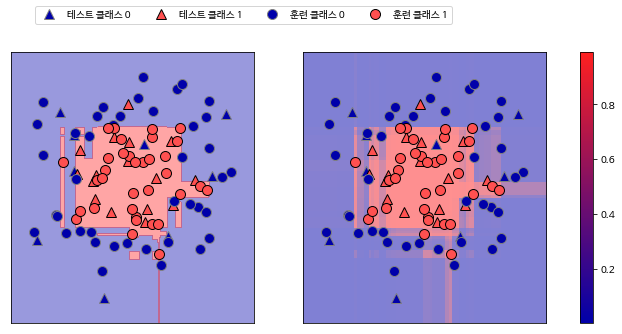

In [5]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5,
                                            cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax)
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['테스트 클래스 0', '테스트 클래스 1', '훈련 클래스 0', '훈련 클래스 1'], ncol=4, loc=(.1,1.1))

# 다중분류에서의 불확실성

* decision_function
* 이진분류에서는 관례로 인해 class_[1]에 해당하는 값을 가지고 있지만 다중분류에서는 열이 n_class만큼 있음

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0).fit(X_train, y_train)
print('decision_funtion 결과값 :\n', gbrt.decision_function(X_test)[:6,:])

decision_funtion 결과값 :
 [[-1.945 -2.015  0.128]
 [-1.948  0.05  -1.87 ]
 [ 0.084 -2.016 -1.867]
 [-1.945 -2.015  0.128]
 [ 0.084 -2.016 -1.867]
 [-1.945 -2.015  0.128]]


=> 각 클래스에 확신하는 정도, 최대값의 class를 예측으로 함 <br><br>

* predict_proba

In [7]:
print('예측 확률 :\n', gbrt.predict_proba(X_test)[:6,:])

예측 확률 :
 [[0.101 0.094 0.804]
 [0.106 0.78  0.114]
 [0.791 0.097 0.112]
 [0.101 0.094 0.804]
 [0.791 0.097 0.112]
 [0.101 0.094 0.804]]
